# **Setup**

For this lab, we will be using the following libraries:

pandas for managing the data.

numpy for mathematical operations.

sklearn for machine learning and machine-learning-pipeline related functions.

matplotlib for additional plotting tools.

plotly for extracting the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    confusion_matrix

)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

# Training and Testing Data Splits

In this example, we generate a dataset with 100 samples and 5 features using numpy.random.rand. We also generate corresponding target labels (y) using numpy.random.randint. We then use train_test_split from sklearn.model_selection to split the data into training and testing sets, with a test size of 20% (test_size=0.2). Finally, we a the shapes of the training and testing sets to verify the sizes of the splits.


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a dataset with 100 samples and 5 features
num_samples = 100
num_features = 5
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, size=num_samples)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 5) (80,)
Testing set shape: (20, 5) (20,)


#**Supervised Learning**



##  **1) Classification Models**

 Here's an explanation of the metrics used for the classification model we will build:
 #### 1. Confusion Matrix:
 The confusion matrix provides a summary of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions.

||Actual Positive|Actual Negative|
|-|-|-|
**Predicted Positive** | True Positive   | False Negative  |
**Predicted Negative** | False Positive  | True Negative   |

#### 2. Accuracy:
Accuracy measures the proportion of correct predictions out of the total predictions. It is calculated by dividing the sum of true positives and true negatives by the total number of samples.

`Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)`

#### 3. Precision:
Precision quantifies the model's ability to correctly predict positive samples. It is the ratio of true positives to the sum of true positives and false positives. Precision reflects the model's accuracy when it predicts positive.

`Precision = True Positives / (True Positives + False Positives)`

#### 4. Recall (Sensitivity or True Positive Rate):
Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive samples. It is the ratio of true positives to the sum of true positives and false negatives. Recall reflects the model's ability to capture all positive samples.

`Recall = True Positives / (True Positives + False Negatives)`

#### 5. Specificity (True Negative Rate):
Specificity, also known as true negative rate, measures the model's ability to correctly identify negative samples. It is the ratio of true negatives to the sum of true negatives and false positives. Specificity reflects the model's accuracy when it predicts negative.

`Specificity = True Negatives / (True Negatives + False Positives)`

#### 6. F1 Score:
The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score is useful when there is an uneven class distribution or when both precision and recall are equally important.

`F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
X = np.random.rand(200, 4)  # Input features
y = np.random.randint(0, 2, size=200)  # Binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives
tp = cm[1, 1]
# False Positives
fp = cm[0, 1]
# False Negatives
fn = cm[1, 0]
# True Negatives
tn = cm[0, 0]

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# Specificity
specificity = tn / (tn + fp)
# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)


# Print the evaluation metrics
print("Confusion Matrix:", cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("Specificity:", specificity)
print('F1 Score:', f1)

Confusion Matrix: [[20  3]
 [13  4]]
Accuracy: 0.6
Precision: 0.5714285714285714
Recall: 0.23529411764705882
Specificity: 0.8695652173913043
F1 Score: 0.3333333333333333


##  **1) Regression Models**

Here's an explanation of the metrics used for the regression model we will build:

#### 1. Mean Squared Error (MSE):
MSE measures the average squared difference between the predicted values and the actual values. It is calculated as follows:

`MSE = (1/n) * Σ(y_actual - y_predicted)^2`

where:

- `MSE` represents the Mean Squared Error.
- `n` is the total number of data points.
- `Σ` denotes the summation symbol.
- `y_actual` represents the actual values of the target variable.
- `y_predicted` represents the predicted values from the linear regression model.
In the code, `mean_squared_error(y_test, y_pred)` calculates the MSE for the dataset using the test set.

#### 2. Root Mean Squared Error (RMSE):
RMSE is the square root of the MSE, and it provides a measure of the average difference between the predicted values and the actual values in the original units. The formula for RMSE is:

`RMSE = sqrt(MSE)`

In the code, `mean_squared_error(y_test, y_pred)` calculates the RMSE for the dataset.

#### 3. Mean Absolute Error (MAE):
MAE measures the average absolute difference between the predicted values and the actual values. It is calculated as:

`MAE = (1/n) * Σ|y_actual - y_predicted|`

In the code, `mean_absolute_error(y_test, y_pred)` calculates the MAE for the dataset.

#### 4. R-Squared (R^2):
R-Squared, also known as the coefficient of determination, measures the proportion of the total variation in the target variable that can be explained by the linear regression model. It ranges from 0 to 1, with a higher value indicating a better fit. The formula for R-Squared is:

`R^2 = 1 - (SSR / SST)`

where:

- `R^2` represents the R-Squared score.
- `SSR` is the sum of squared residuals (the sum of squared differences between the predicted values and the actual values).
- `SST` is the total sum of squares (the sum of squared differences between the actual values and their mean).
In the code, `r2_score(y_test, y_pred)` calculates the R^2 score for the dataset.


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
X = np.random.rand(200, 1)  # Input feature
y = 2 + 3 * X + np.random.randn(200, 1)  # True underlying relationship + random noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 1.0846238625454692
Root Mean Squared Error: 1.08
Mean Absolute Error: 0.8387402733729706
R-squared: 0.240964423634343


# **Unsupervised Learning**
## **Dimensionality Reduction Using Principal Component Analysis (PCA)**


PCA (Principal Component Analysis) is a dimensionality reduction technique. It is commonly used to reduce the number of features or variables in a dataset while retaining most of the information present in the original data. Performing PCA can sometimes lower accuracy because it involves reducing the dimensionality of the data by projecting it onto a lower-dimensional subspace. This reduction in dimensionality can result in some loss of information, which may affect the performance of certain algorithms that rely heavily on the original feature space.

Despite potentially lowering accuracy, PCA is still widely used for the following reasons:

1. Dimensionality reduction: Simplifies high-dimensional data by reducing the number of features, making analysis more manageable.
2. Feature interpretation: Transforms features into uncorrelated principal components, revealing key contributors to variance and underlying data structure.
3. Noise reduction: Filters out noisy or irrelevant features, enhancing model robustness by focusing on informative aspects.
4. Computational efficiency: Reduces memory, storage, and computation requirements, making complex algorithms more efficient and scalable, especially for large datasets.
5. Visualization: Enables effective visualization of high-dimensional data in lower-dimensional spaces, facilitating exploration and communication of insights.


Original shape:  (105, 5)
Accuracy on original dataset: 1.0
Transformed shape:  (105, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


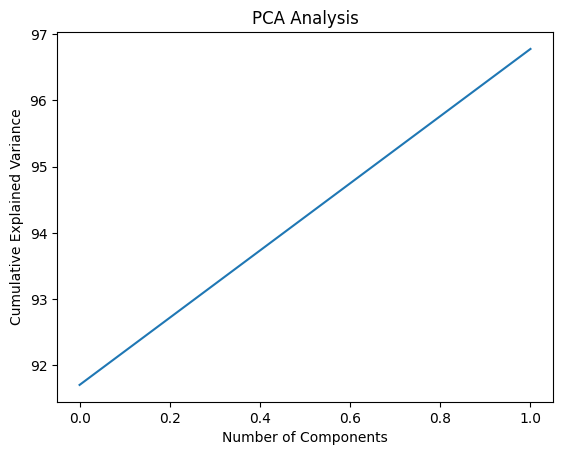

Accuracy on transformed dataset: 1.0


In [5]:
# Step 1: Load the iris dataset from plotly.express
df = px.data.iris()

# Extract features and target variable
X = df.drop('species', axis=1).values
y = df['species'].values


# Logistic regression on the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Original shape: ", X_train.shape)
lr_original = LogisticRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)
cm = confusion_matrix(y_test, y_pred_original)
tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives
tn = cm[0, 0]  # True Negatives
accuracy_original = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on original dataset:', accuracy_original)

# Perform PCA
covar_matrix = PCA(n_components=2) # The n_components parameter determines the number of dimensions the data will be reduced to.
X_train_transformed = covar_matrix.fit_transform(X_train) # fits the PCA model to the training data X_train and simultaneously applies the transformation.
print("Transformed shape: ", X_train_transformed.shape)
X_test_transformed = covar_matrix.transform(X_test) # projects the testing data onto the same reduced feature space as the training data
variance = covar_matrix.explained_variance_ratio_  # Calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=6) * 100)  # Cumulative sum of variance explained with [n] features

# Plot explained variance
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

# Logistic regression on the transformed dataset
lr_transformed = LogisticRegression()
lr_transformed.fit(X_train_transformed, y_train)
y_pred_transformed = lr_transformed.predict(X_test_transformed)
cm_transformed = confusion_matrix(y_test, y_pred_transformed)
tp = cm_transformed[1, 1]  # True Positives
fp = cm_transformed[0, 1]  # False Positives
fn = cm_transformed[1, 0]  # False Negatives
tn = cm_transformed[0, 0]  # True Negatives
accuracy_transformed = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on transformed dataset:', accuracy_transformed)

### Exercise 1 - Build a linear regression with the dataset below and evaluate the model
Instruction:
1. Split the dataset into a training set (70% of the data) and a test set (30% of the data).
2. Implement linear regression
3. Train the linear regression model on the training set
4. Evaluate the trained model's performance on the test set by calculating the Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R-squared

In [13]:
# Load the california_housing dataset having a continuous target variable.
data_r = datasets.fetch_california_housing()

# Make a DataFrame
df_r = pd.DataFrame(np.column_stack([data_r['data'], data_r['target']]), columns=data_r['feature_names'] + ['target'])
df_r.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_16['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df_r.shape

(20640, 9)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_r.iloc[:, :8], df_r['target'], test_size=0.3, random_state=0)

# Create linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 0.5431489670037241
Root Mean Squared Error: 0.54
Mean Absolute Error: 0.5361818140641839
R-squared: 0.5926087785518774


### Exercise 2 - Build a logistic regression with the dataset below and evaluate the model
Instruction:
1. Split the dataset into a training set (70% of the data) and a test set (30% of the data).
2. Implement logistic regression
3. Train the logistic regression model on the training set
4. Evaluate the trained model's performance on the test set by calculating the accuracy, precision, recall, and F1 score.

In [16]:
# Load the california_housing dataset having a continuous target variable.
data_l = datasets.fetch_california_housing()
# Make a DataFrame
df_l = pd.DataFrame(np.column_stack([data_l['data'], data_l['target']]), columns=data_l['feature_names'] + ['target'])
df_l['target'] = df_l['target'].apply(lambda x: 1 if x > df_l['target'].mean() else 0)
df_l.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['MedInc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('MedInc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['HouseAge']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('HouseAge')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['AveRooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('AveRooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['AveBedrms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('AveBedrms')

from matplotlib import pyplot as plt
_df_12['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
df_l.shape

(20640, 9)

In [19]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df_l.iloc[:, :8], df_l['target'], test_size=0.3, random_state=0)

# Create logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives
tp = cm[1, 1]
# False Positives
fp = cm[0, 1]
# False Negatives
fn = cm[1, 0]
# True Negatives
tn = cm[0, 0]

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# Specificity
specificity = tn / (tn + fp)
# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)


# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("Specificity:", specificity)
print('F1 Score:', f1)

Confusion Matrix:
 [[3213  473]
 [ 769 1737]]
Accuracy: 0.7994186046511628
Precision: 0.785972850678733
Recall: 0.6931364724660815
Specificity: 0.8716766142159522
F1 Score: 0.7366412213740459


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Exercise 3 - Perform PCA on the data below to plot the corresponding Cumulative Explained Variance


In [20]:
np.random.seed(0)
X_train = np.random.rand(100, 8)  # 100 samples with 8 features
X_test = np.random.rand(50, 8)  # 50 samples with 8 features

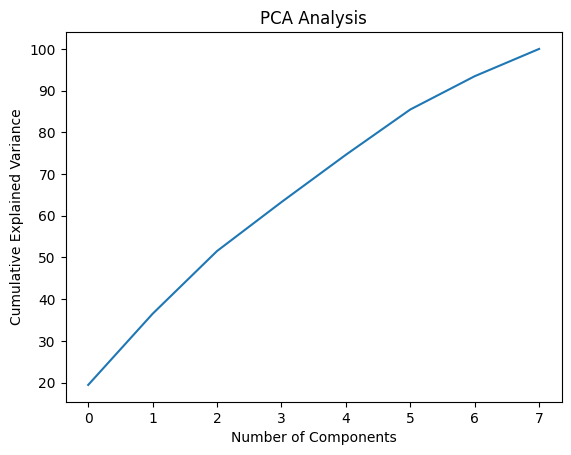

In [21]:
# Perform PCA
covar_matrix = PCA(n_components=8)  # We have 8 features
X_train_pca = covar_matrix.fit_transform(X_train)
X_test_pca = covar_matrix.transform(X_test)
variance = covar_matrix.explained_variance_ratio_  # Calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=6) * 100)  # Cumulative sum of variance explained with [n] features

# Plot explained variance
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()